In [1]:
# imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print('x_train shape: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)


In [3]:
# reshape the data
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [4]:
# No of Classes
K = len(set(y_train))
print('No of Classes: ', K)

No of Classes:  10


In [5]:
# Build the model with functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = Conv2D(64,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = Conv2D(128,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [6]:
# Compile and Fit
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 74s 38ms/step - loss: 0.4337 - accuracy: 0.8419 - val_loss: 0.3412 - val_accuracy: 0.8749
Epoch 2/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2947 - accuracy: 0.8909 - val_loss: 0.3198 - val_accuracy: 0.8820
Epoch 3/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2485 - accuracy: 0.9087 - val_loss: 0.2677 - val_accuracy: 0.8978
Epoch 4/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2160 - accuracy: 0.9189 - val_loss: 0.2519 - val_accuracy: 0.9081
Epoch 5/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1880 - accuracy: 0.9278 - val_loss: 0.2886 - val_accuracy: 0.9041
Epoch 6/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1674 - accuracy: 0.9359 - val_loss: 0.2416 - val_accuracy: 0.9150
Epoch 7/15
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1467 - accuracy: 0.9446 - val_loss: 0.2727 -

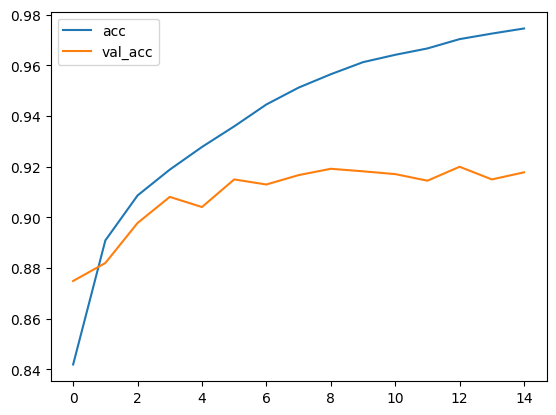

In [7]:
# plot accuracy and loss
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

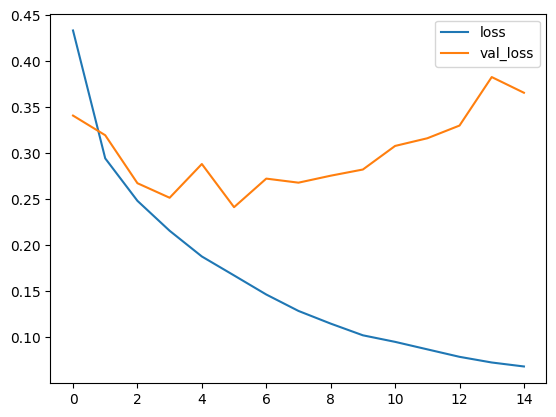

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [9]:
# Label Mapping
labels = '''T-Shirt/Top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [10]:
p_test = model.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 3s 8ms/step


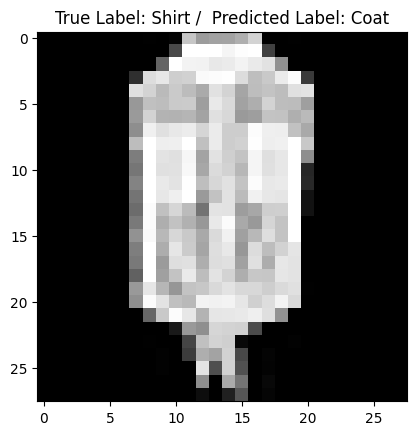

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('True Label: %s /  Predicted Label: %s' % (labels[y_test[i]], labels[p_test[i]]));